# ggplot 222 - make smooth lines with geom_smooth


# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
dia = pd.read_csv('./dat/dia.csv')

# 2 - example smooth line 

First have a look at the data points again.

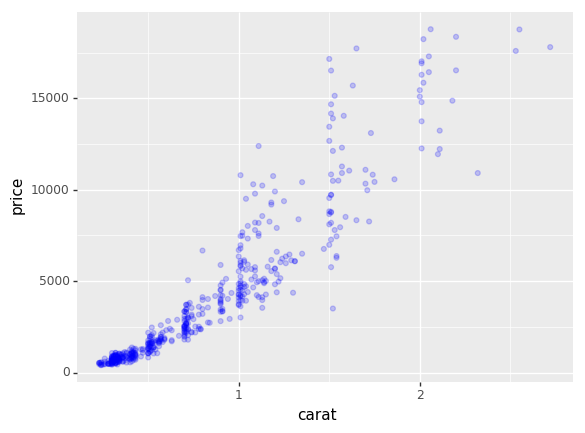

<ggplot: (-9223372036841388621)>

In [3]:
ggplot(data= dia, mapping=aes(x='carat', y='price')) + \
    geom_point(color='blue', alpha=0.2)

Now find a smooth line through the "middle" of the dot cloud.  
geom_smooth() produces such a line.

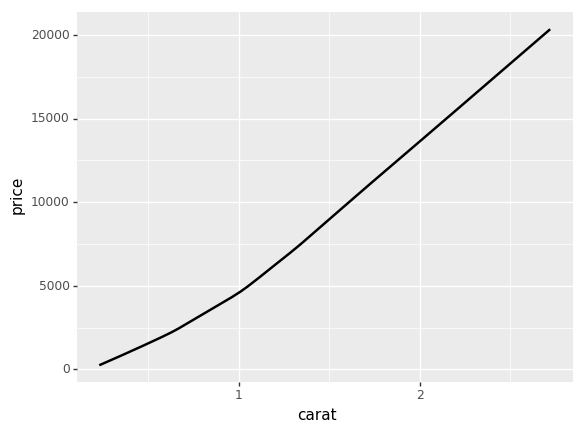

<ggplot: (13427983)>

In [4]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
    geom_smooth()

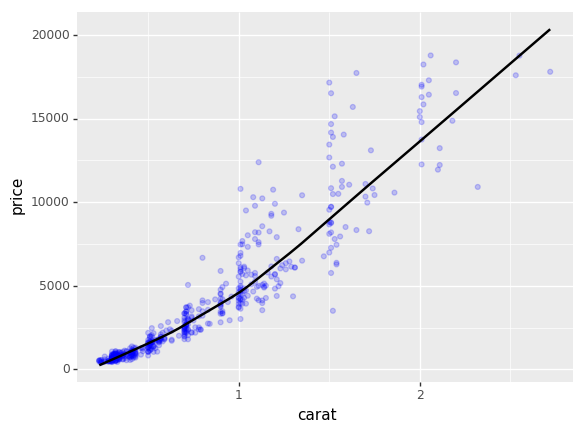

<ggplot: (-9223372036841290303)>

In [5]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
    geom_point(color='blue', alpha=0.2) + \
    geom_smooth()

As you can see the smooth line goes trough the "middle" of the dots.

We can use the smooth line as a sort of summery of the points cloud  
(the line capturers the pattern in the dot-cloud in a concise way)

## Aesthetics  

x -------- (x position)  
y -------- (y position)  
alpha ---- (transparency)  
color ---- (color of the line)  
fill ----- (color of the shaded area around the line)  
linetype - (either "solid", "dashed" or "dotted" - solid is the default-)  
size ----- (how thick is the line)  

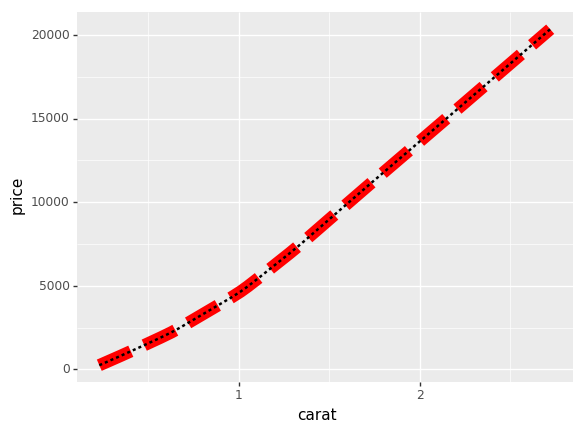

<ggplot: (13568502)>

In [6]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
    geom_smooth(color='red', size=5, linetype='dashed', alpha=0.3) + \
    geom_smooth(linetype='dotted')

# 3 - specify the method to make the smooth line

The smooth line is calculated from the data points.  
There are several methods to do this calculation.  
Depending on the method the resulting line may be different. 

In plotnine the method can be:

- 'auto'       # Use loess or lowess if (n<1000), glm otherwise  
- 'lm', 'ols'  # Linear Model  
- 'wls'        # Weighted Linear Model  
- 'rlm'        # Robust Linear Model  
- 'glm'        # Generalized linear Model  
- 'gls'        # Generalized Least Squares  
- 'lowess'     # Locally Weighted Regression (simple)
- 'loess'      # Locally Weighted Regression
- 'mavg'       # Moving Average
- 'gpr'        # Gaussian Process Regressor

If nothing is specified the method is 'auto'.  
In our case, with 500 data points, the automatically chosen method was 'lowess'

## 3.1 - straigth lines (linear models)

- 'lm', 'ols'  # Linear Model  
- 'wls'        # Weighted Linear Model  
- 'rlm'        # Robust Linear Model  
- 'glm'        # Generalized linear Model  
- 'gls'        # Generalized Least Squares  

All these models result in a straight line. Here is one example with the 'lm' method.

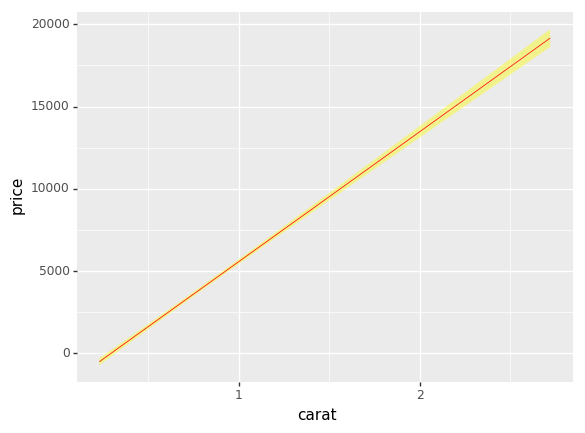

<ggplot: (-9223372036843106153)>

In [16]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        geom_smooth(method='lm', size=0.3, color='red',fill='yellow')

There is a yellow band around the red line.  
The band represents the area where the line should be with high likely-hood.  
The red line is our best guess.

Note not all methods give such a confidence area (e.g. lowess did not)

## 3.2 - non-straigth lines 

- 'lowess'     # Locally Weighted Regression (simple)
- 'loess'      # Locally Weighted Regression
- 'mavg'       # Moving Average
- 'gpr'        # Gaussian Process Regressor

## lowess

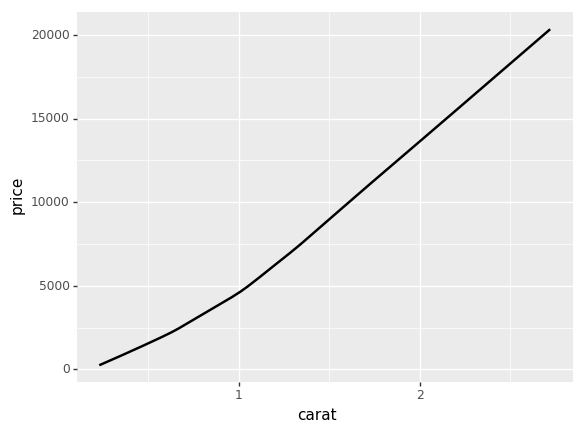

<ggplot: (-9223372036841198178)>

In [8]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        geom_smooth(method='lowess')

## loess

In [9]:
# loess requires scikit-misc 

# ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
#        geom_smooth(method='loess')

## mavg

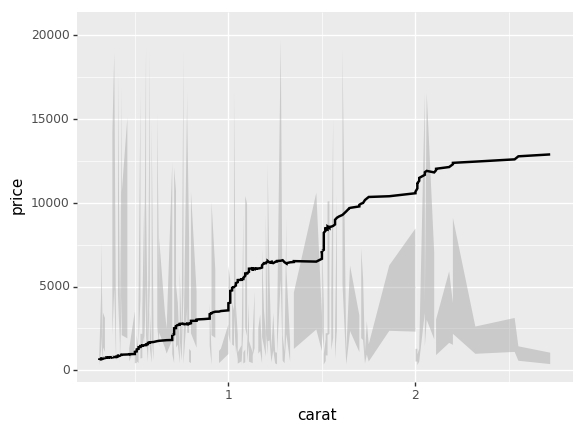

<ggplot: (-9223372036840905903)>

In [13]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        geom_smooth(method='mavg')

**NOTE** in plotnine something goes wrong with the shaded area around the line.  
The black moving average line is OK.

## gpr

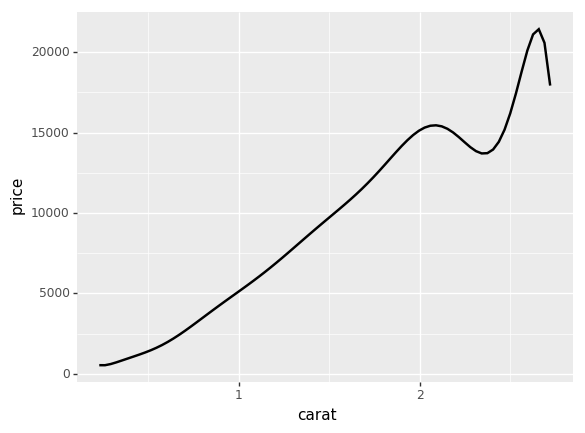

<ggplot: (13730894)>

In [11]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        geom_smooth(method='gpr')